# SWMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in supervised binary classification, namely accuracy, precision, recall and the $F_1$ score. All are called performance _metrics_, though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time.

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
    \def\by{\mathbf{y}}
    \def\bM{\mathbf{M}}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\myfrac#1#2{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ar{rl}{
  p &= \myfrac{TP}{TP + FP}
}
$$

### Recall or Sensitivity

$$
  \ar{rl}{
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  }
$$

### Accuracy

$$
  \ar{rl}{
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  }\
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ar{rl}{
    F_1 &= \myfrac{2pr}{p+r}\\
     &= \myfrac{2}{1/p + 1/r}
  }
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
\bM\st{confusion}~~~ = 
\ar{l|ll}{
                             & \textrm{actual true} & \textrm{actual false} \\ \hline
    \textrm{predicted true}  & TP & FP \\     
    \textrm{predicted false} & FN & TN 
}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.110/fig 3-3. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
\bM\st{confusion}~~~ =
  \left[
  \ar{llll}{
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
 }
 \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Remember to use the '5/not-5' ground-truth data, ala

```python
    y_train_5 = (y_train == '5')    
    y_test_5  = (y_test == '5')
```

not the full 10 class MNIST output categories, since we are dealing with metrics handling only pure binary classifiers (well, there is a way to deal with this using micro/macro averaging of multiclass classifiers, you meet these in the gridsearch exercise later).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator
import numpy as np

# MNIST getter

def MNIST_GetDataSet():
    Data, Target = fetch_openml(name="mnist_784",return_X_y=True, as_frame=False)
    Data = Data / 255 #Converts to binary
    return Data,Target

X,y = MNIST_GetDataSet()
X_train, X_Test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train== '5')
y_test_5 = (y_test== '5')

# Stochastic Gradient Descent classifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
clf_Predict = sgd_clf.predict(X_Test)


# Dummy classifier

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X)), dtype=bool)

# Instantiates the DummyClassifier
Dummy_clf = DummyClassifier()
Dummy_pred = Dummy_clf.predict(X_Test)


def MyAccuracy(y_true, y_pred): 
    if len(y_true) == 0: #Safeguard against division by zero
        # return an error message if the length of y_true is 0
        print("Error: y_true is empty")
        return 0
    TrueValues = 0
    for y, x, in zip(y_true, y_pred): #zip is just syntactic sugar for pairing the two arrays together
        if y == x:
            TrueValues += 1
            
    return TrueValues / len(y_true) #This is the accuracy formula as TrueValues contain both TP and TN 
        

#Run the accuracy function


#Test the accuracy function
from sklearn.metrics import accuracy_score


#Compare the two accuracy functions

print("MyAccuracy: ", MyAccuracy(y_test_5, clf_Predict))
print("Sklearn accuracy: ", accuracy_score(y_test_5, clf_Predict))

print("MyAccuracy: ", MyAccuracy(y_test_5, Dummy_pred))
print("Sklearn accuracy: ", accuracy_score(y_test_5, Dummy_pred))

# As we can see, the accuracy is the same for both my custom function and the sklearn function. Meaning that my custom function works as intended.


MyAccuracy:  0.9769
Sklearn accuracy:  0.9769
MyAccuracy:  0.9108
Sklearn accuracy:  0.9108


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [13]:

from sklearn.metrics import precision_score, recall_score, f1_score


def MyPrecision(y_true, y_pred):
    TP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == True) #let's use list comprehension to make the code more readable
    FP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == False and yp == True)
    
    if TP + FP == 0:
        return 0 #Safeguard against division by zero
    
    return TP / (TP + FP) #Precision formula
    
    

def MyRecall(y_true, y_pred):
    
    TP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == True)
    FN = sum(1 for yt, yp in zip(y_true, y_pred) if yt == True and yp == False)
    
    if TP + FN == 0:
        return 0 #Safeguard against division by zero
    
    return TP / (TP + FN) #Recall formula
    

def MyF1Score(y_true, y_pred):
    
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    
    if precision + recall == 0:
        return 0 #Safeguard against division by zero
    
    return 2/((1/recall) + (1/precision))#F1 score formula


#Test the functions with the SGD classifier

print("MyPrecision: ", MyPrecision(y_test_5, clf_Predict))
print("Sklearn Precision: ", precision_score(y_test_5, clf_Predict))

print("MyRecall: ", MyRecall(y_test_5, clf_Predict))
print("Sklearn Recall: ", recall_score(y_test_5, clf_Predict))

print("MyF1Score: ", MyF1Score(y_test_5, clf_Predict))
print("Sklearn F1Score: ", f1_score(y_test_5, clf_Predict))

#Test the functions with the Dummy classifier
print("\n\n")

print("MyPrecision: ", MyPrecision(y_test_5, Dummy_pred)) 
print("Sklearn Precision: ", precision_score(y_test_5, Dummy_pred))

print("MyRecall: ", MyRecall(y_test_5, Dummy_pred))
print("Sklearn Recall: ", recall_score(y_test_5, Dummy_pred))

print("MyF1Score: ", MyF1Score(y_test_5, Dummy_pred))
print("Sklearn F1Score: ", f1_score(y_test_5, Dummy_pred))

# As we can see, the precision, recall and F1 score is the same for both my custom function and the sklearn function. Meaning that my custom function works as intended. Precision, recall and F1 score are all 0 for the dummy classifier, as it always predicts 0. 



MyPrecision:  0.9460188933873145
Sklearn Precision:  0.9460188933873145
MyRecall:  0.7858744394618834
Sklearn Recall:  0.7858744394618834
MyF1Score:  0.8585425597060624
Sklearn F1Score:  0.8585425597060624



MyPrecision:  0
Sklearn Precision:  0.0
MyRecall:  0.0
Sklearn Recall:  0.0
MyF1Score:  0
Sklearn F1Score:  0.0


E:\DataSpellProjects\SKFSkraper\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_test_5_pred, y_test5)
```

instead of 
```python
confusion_matrix(y_test_5, y_test_5_pred)
```

In [15]:
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test_5, Dummy_pred)
M_SGD = confusion_matrix(y_test_5, clf_Predict)

print("M_dummy: ", M_dummy)
print("M_SGD: ", M_SGD)

#The confusion matrix is organized as follows:
# [[TN FP]
#  [FN TP]]

#If you mess up the parameters, you will get a transposed version of the confusion matrix. This is because the first parameter is the predicted values and the second parameter is the actual values. If you switch the two parameters, you will get the predicted values as the rows and the actual values as the columns.



M_dummy:  [[9108    0]
 [ 892    0]]
M_SGD:  [[9068   40]
 [ 191  701]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for you when analysing multiclass data in the future.

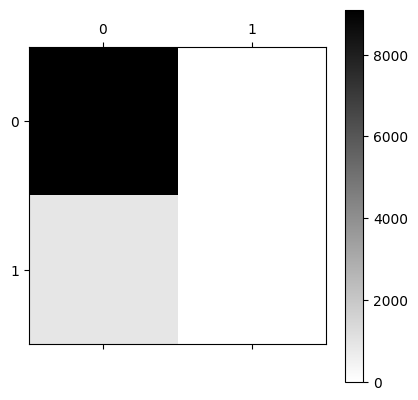

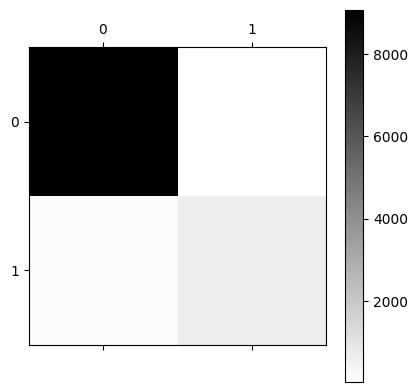

In [24]:
import matplotlib.pyplot as  plt
# use the matplotlib matshow function to display a heat map of the confusion matrix

plt.matshow(M_dummy, cmap=plt.cm.gray_r)  # gray_r is a gray colormap, r stands for reverse, meaning that 0 is white and 1 is black
plt.colorbar()
plt.show()  

plt.matshow(M_SGD, cmap=plt.cm.gray_r)
plt.colorbar()
plt.show()

# as we can see, we more values that are TN then TP as expected since we are only predicting 5s

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
#Its vitally important to fully understand why we use certain metrics and how they are calculated. This is important because it allows us to understand the performance of our models and how they can be improved. The overall learning outcome of the exercises is that we now have a better understanding of how to calculate and use the accuracy, precision, recall and F1 score metrics. We also have a better understanding of how to use the confusion matrix and how to interpret it. This is important because it allows us to understand the performance of our models and how they can be improved. 


REVISIONS||
:- | :- |
2018-12-19| CEF, initial.
2018-02-07| CEF, updated.
2018-02-07| CEF, rewritten accuracy paradox section.
2018-03-05| CEF, updated with SHN comments.
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-02-17| CEF, added implementation note on denominator=0.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2020-09-21| CEF, fixed factor 2 error in beta-harmonic.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 STMAL.
2023-02-07| CEF, update HOML page numbers.
2023-02-09| CEF, chagned y_train to y_test in conf. matrix call.
2023-08-30| CEF, minor table change.
2023-10-02| CEF, changed LaTeX commands to defs to get both KaTeX and MathJax to work.
2023-10-10| CEF, elaborated on binary classifer data (y=='5'), and not using full 10-class MNIST categories. 